In [1]:
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder.appName('Project').getOrCreate()

In [3]:
import pandas as pd
df=pd.read_csv("housing_train.csv")

In [4]:
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,...,0,0,0,NaN,NaN,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.0564,-83.0417,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.0451,-82.4564,oh


In [5]:
df.drop(columns=["wheelchair_access","comes_furnished","electric_vehicle_charge"])

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,1,1,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,1,1,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,1,1,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,1,1,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,1,1,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,1,1,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,1,1,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,1,1,NaN,NaN,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.0564,-83.0417,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,1,1,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.0451,-82.4564,oh


In [6]:
df.dropna()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265183,7049194586,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,870,apartment,933,2,2.0,1,...,0,0,0,w/d hookups,street parking,https://images.craigslist.org/00G0G_3wSexhiMcr...,"At Winchester Park, you can choose from 1 & 2 ...",39.8971,-82.8957,oh
265184,7050888256,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,929,apartment,728,1,1.0,1,...,1,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00v0v_cE9ismC2Ad...,"Designed with your comfort in mind, Bexley Hou...",39.9709,-82.9241,oh
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh


In [7]:
df2=pd.read_csv("housing_train.csv")

In [8]:
df2

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,...,0,0,0,NaN,NaN,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.0564,-83.0417,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.0451,-82.4564,oh


In [9]:
df.head()


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [10]:
# df2 = df2.dropna()

In [11]:
null_values=df2.isnull().sum()
blanks=(df2 == '').sum()
df2 = df2.dropna()
df2=df2.drop(columns=blanks[blanks>0].index)
df2=df2.fillna(0)
for column in df2.columns:
    if df2[column].isnull().sum()>0:
        mean_value=df2[column].mean()
        df2[column]=df2[column].fillna(mean_value)
df2.to_csv('houseRent.csv',index=False)

In [12]:
# blanks=(df2 == '').sum()

In [13]:
# df2=df2.drop(columns=blanks[blanks>0].index)

In [14]:
# df2=df2.fillna(0)

In [15]:
# for column in df2.columns:
#     if df2[column].isnull().sum()>0:
#         mean_value=df2[column].mean()
#         df2[column]=df2[column].fillna(mean_value)

In [16]:
# df2.to_csv('houseRent',index=False)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data=pd.read_csv('houseRent.csv') #loading cleaned data set

In [19]:
data.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,1.642830e+05,1.642830e+05,1.642830e+05,164283.000000,164283.000000,164283.000000,164283.000000,164283.000000,164283.000000,164283.000000,164283.000000,164283.000000,164283.000000
mean,7.040979e+09,1.885828e+04,1.148372e+03,1.933341,1.477947,0.766695,0.739955,0.648235,0.101976,0.019320,0.059038,37.766159,-94.170696
std,8.841901e+06,6.830498e+06,2.920158e+04,4.640400,0.648084,0.422936,0.438660,0.477523,0.302618,0.137649,0.235697,5.744449,17.587915
min,7.004032e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035968e+09,8.220000e+02,7.500000e+02,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.979500,-105.869000
50%,7.043401e+09,1.084000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.666800,-88.641200
75%,7.048479e+09,1.500000e+03,1.160000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.602500,-81.606600
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.993700,172.633000


<Axes: >

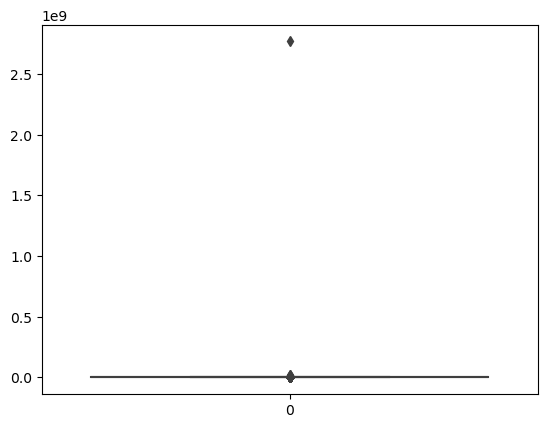

In [21]:
sns.boxplot(data["price"]) #Boxplot